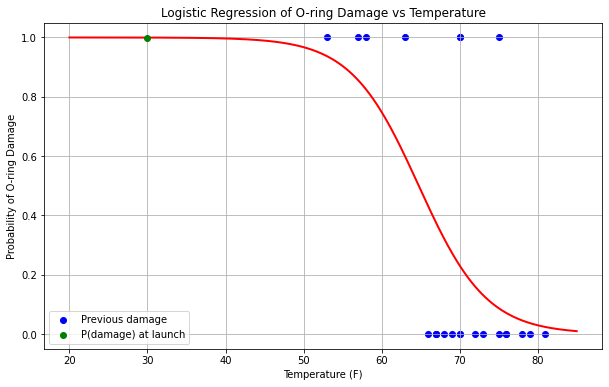

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Load the CSV file
df = pd.read_csv('challenger_data.csv')

# 2. Split the data
X = df["Temperature (F)"].values.reshape(-1, 1)  # Features
y = df["O-ring Damage"].values  # Target

# 3. Apply logistic regression
clf = LogisticRegression()
clf.fit(X, y)

# Predict probabilities
X_test = np.linspace(20, 85, 300)
y_prob = clf.predict_proba(X_test.reshape(-1, 1))[:, 1]

# 4. Plot the logistic regression curve and data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Previous damage')
plt.plot(X_test, y_prob, color='red', linewidth=2)

# Adding the new data point
launch_temp = 30
launch_prob = clf.predict_proba([[launch_temp]])[0][1]
plt.scatter(launch_temp, launch_prob, color='green', zorder=5, label ='P(damage) at launch' )

plt.xlabel('Temperature (F)')
plt.ylabel('Probability of O-ring Damage')
plt.title('Logistic Regression of O-ring Damage vs Temperature')
plt.legend()
plt.grid(True)
plt.show()
